<h1><center>INF285 - Computación Científica </center></h1>
<h1><center>Tarea 4</center></h1>
<h3><center>Claudia Hazard Valdés  <br> <br/> claudia.hazard.14@sansano.usm.cl <br><br/>              201404523-9</center></h3>  _Mayo 2017_

* [1.- Introducción](#Intro)
* [2.- Desarrollo y análisis de resultados](#Des)
    * [PALU](#PALU)
    * [Métodos Iterativos](#MET)
* [3.- Conclusiones](#con)
* [4.- Referencias](#ref)

<div id='Intro' />
<h2>1. Introducción</h2>

Existen muchos problemas donde se deben encontrar incognitas en un sistema de ecuaciónes, en ocaciones realizarlo manualmente puede ser una buena opción pero siempre se encuentra el factor de error humano, ademas para casos de gran cantidad de incognitas resulta una tarea sumamente dificil de realizar, para esto se han creado distintos algoritmos que deben cumplir con ciertas condiciones ademas de estar sujetos a ciertos errores. Se ha realizado el uso de distintos metodos de resolución de ecuaciones y realizado un análisis de las soluciones obtenidas.


<div id='Des' />
<h2>2. Desarrollo y análisis de resultados.</h2>

In [1]:
%matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.mlab as mlab
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact
from ipywidgets import widgets
import matplotlib
import matplotlib.cm as cm

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16

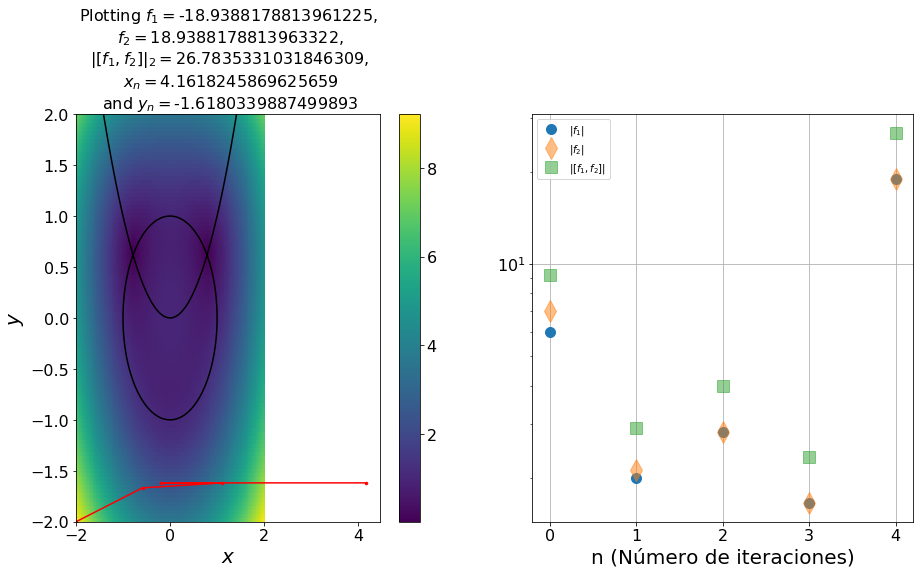

In [2]:

def visual(n_steps_newton=2,x00=0.5,x01=2):
    # Vector form of the initial guess
    x0=np.array([x00,x01])

    # The functions to be solved
    f1v=np.vectorize(lambda x,y: y-x**2)
    f2v=np.vectorize(lambda x,y: x**2+y**2-1)
    nf1f2v=np.vectorize(lambda x,y: np.linalg.norm(np.array([f1v(x,y),f2v(x,y)])))
    
    # The jacobian matrix for f1 and f2
    JM=np.vectorize(lambda x,y: np.array([[-2*x,1],[2*x,2*y]]))

    # Creating matrix to store all approximations made by the Newton's method
    xs=np.zeros((2,n_steps_newton+1))
    xs[:,0]=x0

    # Applying Newton's method n_steps_newton
    for n in np.arange(n_steps_newton):
        b=np.array([[f1v(xs[0,n],xs[1,n])],[f2v(xs[0,n],xs[1,n])]])
        # HINT: HERE IS WHERE YOU NEED TO USE PALU OR GAUSS-SEIDEL!!!
        xs[:,n+1]=xs[:,n]-np.linalg.solve(JM(xs[0,n],xs[1,n]),b).T

    # Data for plotting
    x = np.linspace(-2.0, 2.0, 100)
    y = np.linspace(-2.0, 2.0, 100)
    [X,Y]=np.meshgrid(x,y)

    # Visualization! It is very important you learn about visualization in general.
    plt.figure(figsize=(15,7.5))
    
    plt.subplot(1, 2, 1)
    CS = plt.pcolor(X,Y,nf1f2v(X,Y))
    plt.contour(X, Y, f1v(X,Y), levels=[0], colors='k')
    plt.contour(X, Y, f2v(X,Y), levels=[0], colors='k')
    plt.colorbar(CS)
    plt.plot(xs[0,:],xs[1,:],'.r',markersize=5)
    plt.plot(xs[0,:],xs[1,:],'-r')
    plt.axis('tight')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    f1_at_x0=float(f1v(xs[0,-1],xs[1,-1]))
    f2_at_x0=float(f2v(xs[0,-1],xs[1,-1]))
    nf1f2v_at_x0=float(nf1f2v(xs[0,-1],xs[1,-1]))
    plt.title('Plotting $f_1=${:.16f},\n $f_2=${:.16f},\n $\|[f_1,f_2]\|_2=${:.16f}, \n $x_n=${:.16f}\n and $y_n=${:.16f}'.format(f1_at_x0,f2_at_x0,nf1f2v_at_x0,xs[0,-1],xs[1,-1]))
    
    plt.subplot(1, 2, 2)
    x_i=xs[0,:]
    y_i=xs[1,:]
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f1v(x_i,y_i)),'.',label='$|f_1|$',markersize=20)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f2v(x_i,y_i)),'d',label='$|f_2|$',markersize=15,alpha=0.5)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(nf1f2v(x_i,y_i)),'s',label='$\|[f_1,f_2]\|$',markersize=12,alpha=0.5)
    plt.xlabel('n (Número de iteraciones)')
    plt.grid(True)
    plt.legend(loc='best')
    
    plt.show()

interact(visual,n_steps_newton=(1,10),x00=(-2,2,0.1),x01=(-2,2,0.1))


<div id='PALU' />
          <h2> - PALU </h2>
<p style="font-size:16px"><b>a) </b> Dentro de la función visual, reemplazar la <code>función np.linalg.solve</code> (destacado en comentarios) con el método <b>PALU</b> para resolver el sistema de ecuaciones, para los puntos iniciales indicados más abajo, ¿Que observaciones puede destacar del comportamiento del método  y las soluciones encontradas? ¿Existen mejoras si aumenta el número de iteraciones? ¿Cuantas iteraciones se necesitan para saturar la solución?</p>

1. **(5 puntos)** $\mathbf{x}_0=\langle1,2\rangle$
2. **(10 puntos)** $\mathbf{x}_0=\langle0,2\rangle$
3. **(15 puntos)** $\mathbf{x}_0=\langle-2,-2\rangle$


In [3]:
#permutation between rows i and j on matrix A
def row_perm(A, i, j):
    tmp = np.copy(A[i])
    A[i] = A[j]
    A[j] = tmp

def palu_decomp(A, show=False):
    N,_ = A.shape
    P = np.identity(N)
    L = np.zeros((N,N))
    U = np.copy(A)
    if show:
        print('Initial matrices')
        print('P = '); print(np.array_str(P, precision=2, suppress_small=True))
        print('L = '); print(np.array_str(L, precision=2, suppress_small=True))
        print('U = '); print(np.array_str(U, precision=2, suppress_small=True))
        print('----------------------------------------')
    #iterating through columns
    for j in range(N-1):
        #determine the new pivot
        p_index = np.argmax(np.abs(U[j:,j]))
        if p_index != 0:
            row_perm(P, j, j+p_index)
            row_perm(U, j, j+p_index)
            row_perm(L, j, j+p_index)
            if show:
                print('A permutation has been made')
                print('P = '); print(np.array_str(P, precision=2, suppress_small=True))
                print('L = '); print(np.array_str(L, precision=2, suppress_small=True))
                print('U = '); print(np.array_str(U, precision=2, suppress_small=True))
                print('----------------------------------------')
        #iterating through rows
        for i in range(j+1,N):
            L[i,j] = U[i,j]/U[j,j]
            U[i] -= L[i,j]*U[j]
            if show:
                print('P = '); print(np.array_str(P, precision=2, suppress_small=True))
                print('L = '); print(np.array_str(L, precision=2, suppress_small=True))
                print('U = '); print(np.array_str(U, precision=2, suppress_small=True))
                print('----------------------------------------')
    np.fill_diagonal(L,1)
    return P,L,U

In [4]:
def solve_triangular(A, b, upper=True):
    n = b.shape[0]
    x = np.zeros_like(b)
    if upper==True:
        #perform back-substitution
        x[-1] = (1./A[-1,-1]) * b[-1]
        for i in range(n-2, -1, -1):
            x[i] = (1./A[i,i]) * (b[i] - np.sum(A[i,i+1:] * x[i+1:]))
    else:
        #perform forward-substitution
        x[0] = (1./A[0,0]) * b[0]
        for i in range(1,n):
            x[i] = (1./A[i,i]) * (b[i] - np.sum(A[i,:i] * x[:i]))
    return x

def solve_palu(A, b, show=False):
    P,L,U = palu_decomp(A, show)
    #A.x = b -> P.A.x = P.b = b'
    b = np.dot(P,b)
    # L.c = b' with c = U.x
    c = solve_triangular(L, b, upper=False)
    x = solve_triangular(U, c)
    return x

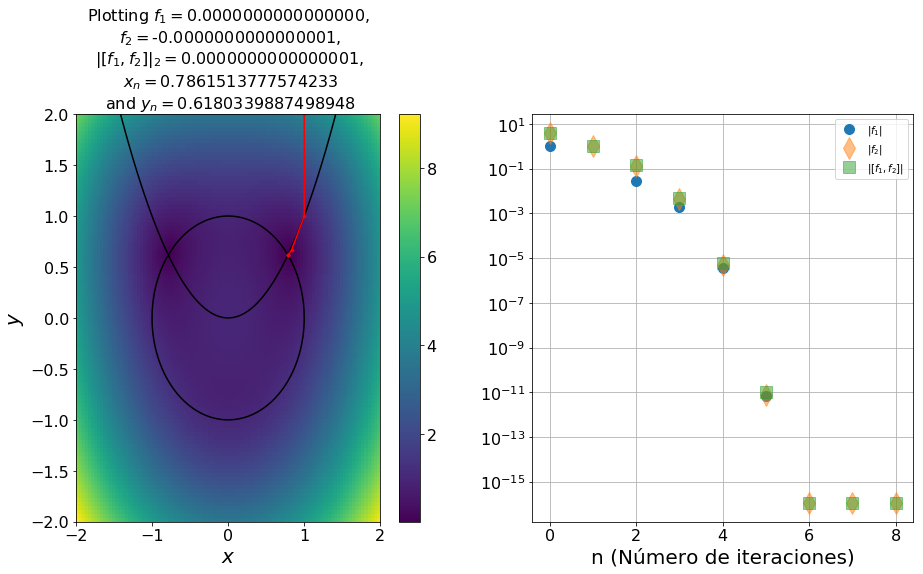

In [5]:
def visual2(n_steps_newton=2,x00=0.5,x01=2):
    # Vector form of the initial guess
    x0=np.array([x00,x01])

    # The functions to be solved
    f1v=np.vectorize(lambda x,y: y-x**2)
    f2v=np.vectorize(lambda x,y: x**2+y**2-1)
    nf1f2v=np.vectorize(lambda x,y: np.linalg.norm(np.array([f1v(x,y),f2v(x,y)])))
    
    # The jacobian matrix for f1 and f2
    JM=np.vectorize(lambda x,y: np.array([[-2*x,1],[2*x,2*y]]))

    # Creating matrix to store all approximations made by the Newton's method
    xs=np.zeros((2,n_steps_newton+1))
    xs[:,0]=x0

    # Applying Newton's method n_steps_newton
    for n in np.arange(n_steps_newton):
        b=np.array([[f1v(xs[0,n],xs[1,n])],[f2v(xs[0,n],xs[1,n])]])
        # HINT: HERE IS WHERE YOU NEED TO USE PALU OR GAUSS-SEIDEL!!!
        xs[:,n+1]=xs[:,n]-solve_palu(JM(xs[0,n],xs[1,n]),b).T

    # Data for plotting
    x = np.linspace(-2.0, 2.0, 100)
    y = np.linspace(-2.0, 2.0, 100)
    [X,Y]=np.meshgrid(x,y)

    # Visualization! It is very important you learn about visualization in general.
    plt.figure(figsize=(15,7.5))
    
    plt.subplot(1, 2, 1)
    CS = plt.pcolor(X,Y,nf1f2v(X,Y))
    plt.contour(X, Y, f1v(X,Y), levels=[0], colors='k')
    plt.contour(X, Y, f2v(X,Y), levels=[0], colors='k')
    plt.colorbar(CS)
    plt.plot(xs[0,:],xs[1,:],'.r',markersize=5)
    plt.plot(xs[0,:],xs[1,:],'-r')
    plt.axis('tight')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    f1_at_x0=float(f1v(xs[0,-1],xs[1,-1]))
    f2_at_x0=float(f2v(xs[0,-1],xs[1,-1]))
    nf1f2v_at_x0=float(nf1f2v(xs[0,-1],xs[1,-1]))
    plt.title('Plotting $f_1=${:.16f},\n $f_2=${:.16f},\n $\|[f_1,f_2]\|_2=${:.16f}, \n $x_n=${:.16f}\n and $y_n=${:.16f}'.format(f1_at_x0,f2_at_x0,nf1f2v_at_x0,xs[0,-1],xs[1,-1]))
    
    plt.subplot(1, 2, 2)
    x_i=xs[0,:]
    y_i=xs[1,:]
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f1v(x_i,y_i)),'.',label='$|f_1|$',markersize=20)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f2v(x_i,y_i)),'d',label='$|f_2|$',markersize=15,alpha=0.5)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(nf1f2v(x_i,y_i)),'s',label='$\|[f_1,f_2]\|$',markersize=12,alpha=0.5)
    plt.xlabel('n (Número de iteraciones)')
    plt.grid(True)
    plt.legend(loc='best')
    
    plt.show()

interact(visual2,n_steps_newton=(1,10),x00=(-2,2,0.1),x01=(-2,2,0.1))

**a)**

1)**Punto (1,2):**
Se puede ver como la función coverge, en la segunda iteración disminuye la distancia entre ambas funciones (f1 y f2) a 0.14  y aun menor para mas pasos de newton, además la solución llega a su maxima convergencia posible (saturación) al realizar 6 operaciones, alcanzando un error cercano a $10^{-16}$

2)**Punto(0,-2):** El metodo no se puede realizar en este caso, debido a que al calcular la matriz triangular se genera un división por $0$. Además la función falla debido a que la matriz generada en (0,-2) tiene determinante 0 y al aplicar esta en linalg.solve no funciona.


3)**Punto(-2,-2):** El metodo no funciona, debido a que la función no converge para la utilización de Newton, ademas al aumentar el n la distancia(error) entre f1 y f2 aumenta, esto implica a que las funciones se alejan por lo que no convergen al mismo numero, mientras que el $y_{i}$ se mantiene en un numero cercano al $-1.6$ mientras que el $x_{i}$ se encuentra variable. Otro de los puntos importantes para este caso, es que la funcion f1 = -f2 por lo su distancia siempre será el doble e irá en aumento.


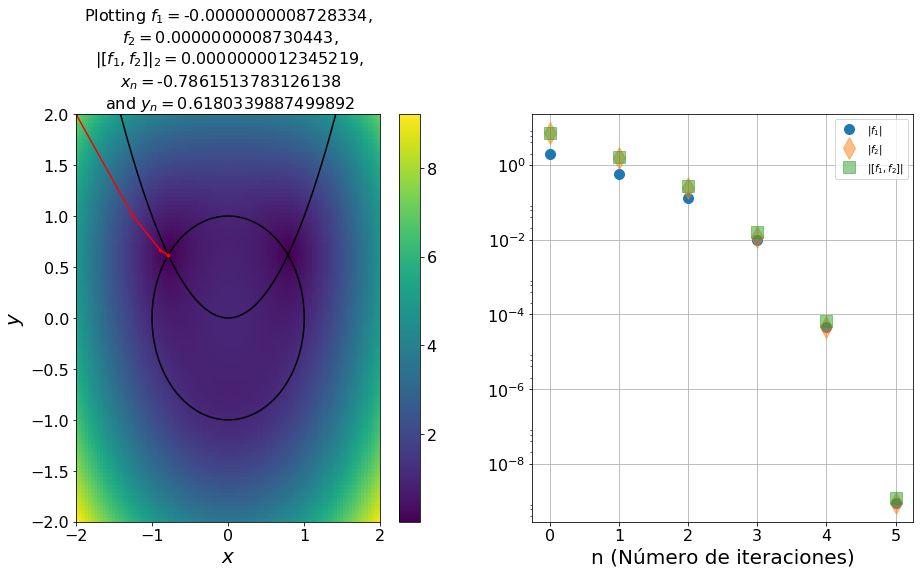

In [6]:
interact(visual2,n_steps_newton=7,x00=-2,x01=2)

<div id='MET' />

<h2> Métodos Iterativos: </h2>
<p style="font-size:16px"><b>b)</b> (1) Acople el método iterativo de <b>Gauss-Seidel</b> al visualizador (llamelo visual2), (2) incluya un cuarto parametro al widget para controlar el número de iteraciones de <b>Gauss-Seidel</b>, (3) use el algoritmo implementado para los siguientes puntos iniciales indicados más abajo. En ambos casos ¿Como afecta el número de iteraciones en la convergencia de la solución? </p>

1. **(30 puntos)** Construir visual2: (1) Acoplando Gauss-Seidel y (2) Incluyendo un cuarto parámetro al widget
2. **(10 puntos)** $\mathbf{x}_0=\langle1,2\rangle$
3. **(10 puntos)** $\mathbf{x}_0=\langle-2,-2\rangle$


**1)**  Se agrega el cuarto parametro e implementa la funcion visual para Gauss-Seidel.

In [7]:
def gauss_seidel(A, b, n_iter=50):
    n = A.shape[0]
    #array with solutions
    X = np.empty((n_iter, n))
    #initial guess
    X[0] = np.zeros(n)
    #submatrices
    R = np.tril(A) #R=(L+D)
    U = A-R
    for i in range(1, n_iter):
        X[i] = solve_triangular(R, b-np.dot(U, X[i-1]), upper=False)
    return X

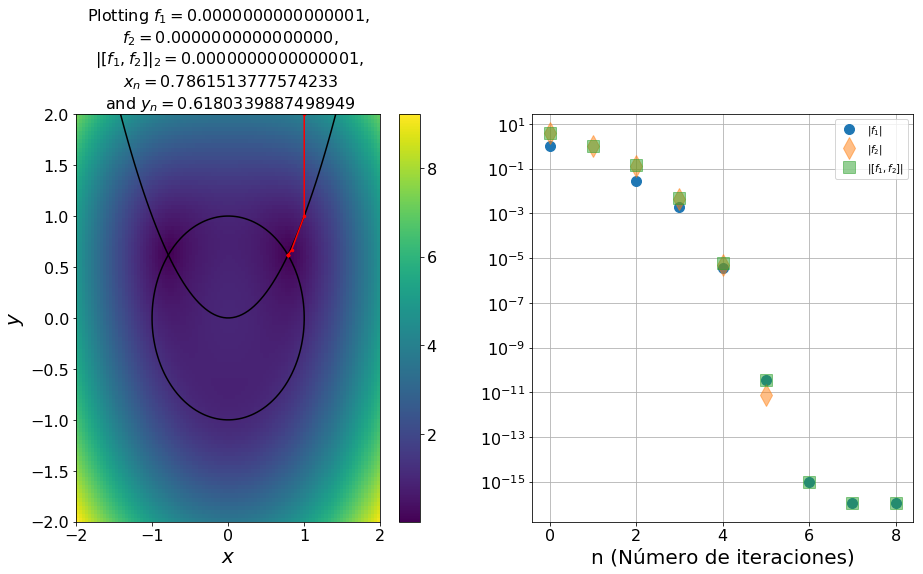

In [9]:
def visual3(n_steps_newton=2,x00=0.5,x01=2,itera=50):
    # Vector form of the initial guess
    x0=np.array([x00,x01])

    # The functions to be solved
    f1v=np.vectorize(lambda x,y: y-x**2)
    f2v=np.vectorize(lambda x,y: x**2+y**2-1)
    nf1f2v=np.vectorize(lambda x,y: np.linalg.norm(np.array([f1v(x,y),f2v(x,y)])))
    
    # The jacobian matrix for f1 and f2
    JM=np.vectorize(lambda x,y: np.array([[-2*x,1],[2*x,2*y]]))

    # Creating matrix to store all approximations made by the Newton's method
    xs=np.zeros((2,n_steps_newton+1))
    xs[:,0]=x0

    # Applying Newton's method n_steps_newton
    for n in np.arange(n_steps_newton):
        b=np.array([[f1v(xs[0,n],xs[1,n])],[f2v(xs[0,n],xs[1,n])]])
        # HINT: HERE IS WHERE YOU NEED TO USE PALU OR GAUSS-SEIDEL!!!
        xs[:,n+1]=xs[:,n]-gauss_seidel(JM(xs[0,n],xs[1,n]),b.T[0],itera)[-1]

    # Data for plotting
    x = np.linspace(-2.0, 2.0, 100)
    y = np.linspace(-2.0, 2.0, 100)
    [X,Y]=np.meshgrid(x,y)

    # Visualization! It is very important you learn about visualization in general.
    plt.figure(figsize=(15,7.5))
    
    plt.subplot(1, 2, 1)
    CS = plt.pcolor(X,Y,nf1f2v(X,Y))
    plt.contour(X, Y, f1v(X,Y), levels=[0], colors='k')
    plt.contour(X, Y, f2v(X,Y), levels=[0], colors='k')
    plt.colorbar(CS)
    plt.plot(xs[0,:],xs[1,:],'.r',markersize=5)
    plt.plot(xs[0,:],xs[1,:],'-r')
    plt.axis('tight')
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    f1_at_x0=float(f1v(xs[0,-1],xs[1,-1]))
    f2_at_x0=float(f2v(xs[0,-1],xs[1,-1]))
    nf1f2v_at_x0=float(nf1f2v(xs[0,-1],xs[1,-1]))
    plt.title('Plotting $f_1=${:.16f},\n $f_2=${:.16f},\n $\|[f_1,f_2]\|_2=${:.16f}, \n $x_n=${:.16f}\n and $y_n=${:.16f}'.format(f1_at_x0,f2_at_x0,nf1f2v_at_x0,xs[0,-1],xs[1,-1]))
    
    plt.subplot(1, 2, 2)
    x_i=xs[0,:]
    y_i=xs[1,:]
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f1v(x_i,y_i)),'.',label='$|f_1|$',markersize=20)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(f2v(x_i,y_i)),'d',label='$|f_2|$',markersize=15,alpha=0.5)
    plt.semilogy(np.arange(n_steps_newton+1),np.abs(nf1f2v(x_i,y_i)),'s',label='$\|[f_1,f_2]\|$',markersize=12,alpha=0.5)
    plt.xlabel('n (Número de iteraciones)')
    plt.grid(True)
    plt.legend(loc='best')
    
    plt.show()

interact(visual3,n_steps_newton=(1,10),x00=(-2,2,0.1),x01=(-2,2,0.1),itera=(1 ,100 ,1))



2)
Utilizando como 50 iteraciones para el metodo de Gauss-Seidel.
**Punto(1,2):** Al realizar 2 iteraciones la función converge, es decir la distancia entre f1 y f2 es menor, en este caso 0.14 muy similar que al utilizar PALU a escepcion de sus cifras en el lugar $10_{-16}$ donde PALU tiene un valor menor, esto se hace mas notorio al realizar 3 iteraciones la diferencia se nota en $10_{-8}$, de esta forma PALU converge de forma mas rapida que Gauss-Seidel. Ahora al analizar la saturación esta ocurre en la iteración 7.
Al utilizar 12 iteraciones para la iteración numero 10 aun no se alcanza la saturación pero la función mantiene su convergencia, mientras que al utilizar 80 iteraciones la función alcanza la saturación en la iteración 6 al igual que en PALU, es decir su convergencia es mas rapida, con un error cercano a $10^{-16}$.


3)**Punto(-2,-2):** Para este punto la operación diverge, sin importar la variación de iteraciones de Gauss.

De lo observado para ambos puntos se puede concluir que al aplicar un mayor numero de iteraciones en Gauss-Seidel la convergencia será mas rapida pero no influirá en el valor de error que pueda ser obtenido, es decir, sin importar el numero de iteraciones de Gauss en este caso el error en la saturación siempre será cercano a $10_{-16}$.


<p style="font-size:16px"><b>c) (20 Puntos)</b> Respecto al análisis realizado en el punto anterior, ¿Que información se desprende del segundo gráfico? ¿Que medida corresponde la curva $\|[f_1 , f_2]\|_2$ ? </p>

$\|[f_1 , f_2]\|_2$ corresponderá al error generado por el metodo de newton ya que indica que tan cerca están las curvas, mientras que f1 y f2 corresponde a los errores del sistema de la ecuación lineal para distintos valores de x e y. 

<div id='con' />
<h2>3. Conclusiones </h2>

Se observó el comportamiento de Gauss, PALU a traves del metodo de Newton, donde ambas funciones obtenian un comportamiento similar esceptuando su convergencia, ademas de la necesidad de un elemento extra para utilizar el metodo de Gauss el cual mientras mayor iteraciones realice mejorará la velocidad de convergencia. Además de que ambas funciones divergen para las mismas matrices.

<div id='ref' />
<h2>4. Referencias </h2>

* _http://matplotlib.org_
* _http://www.lawebdelprogramador.com_
* _https://plot.ly_
* _http://docs.sympy.org_
* _http://nbviewer.jupyter.org_
* _Apuntes CC-2017_